# Oscillation Investigation into NREL Design Loads

OpenFAST simulations are carried out as part of an ongoing research project into design loads. The well-known 5MW NREL reference turbine is used. For wind speeds above the cut-out threshold, very low frequencies for the flapwise moment were observed. This Notebook aims at investigating these. 

In [2]:
# Python includes

import matplotlib.pyplot as plt
import pandas as pd

%matplotlib notebook

from os import path

In [3]:
# exemplary data file lives under ../data/

# convert the header line (copied from the input data file) into a list of names
header_names_raw='Time        Wind1VelX   Wind1VelY   Wind1VelZ   RootMFlp1   RootMFlp2   RootMFlp3   RootMEdg1   RootMEdg2   RootMEdg3   LSSTipVxa   B1Pitch     B2Pitch     B3Pitch     RtSpeed     Wave1Elev   -ReactMXss  -ReactMYss'
header_names = [name for name in header_names_raw.split(' ') if len(name) != 0]

# convert the unit line (copied from the input data file) into a lift of units
header_units_raw='(s)         (m/s)       (m/s)       (m/s)       (kN-m)      (kN-m)      (kN-m)      (kN-m)      (kN-m)      (kN-m)      (rpm)       (deg)       (deg)       (deg)       (rpm)       (m)         (Nm)        (Nm)      '
header_units = [unit for unit in header_units_raw.split(' ') if len(unit) != 0]

# join both lists together to generate a list of names with units
header = [' '.join([name, unit]) for name, unit in zip(header_names, header_units)]

# definition of file paths (should work under windows as well)
file_name = '2_26_V2.out'
data_dir = path.join('..', 'data')
data_file = path.join(data_dir, file_name)

In [56]:
# read in data
data = pd.read_csv(data_file, delimiter='\t', skip_blank_lines=True, skiprows=9, names=header)

# set the Time column as index
data.set_index('Time (s)', inplace=True)

# convert rotations per second to frequency and insert a new column
data.insert(loc=len(data.columns), column='RtSpeed (Hz)', value=data['RtSpeed (rpm)'].apply(lambda x: x/60.0))

## flapwise moments of blade 1, 2 and 3 - time series

<IPython.core.display.Javascript object>


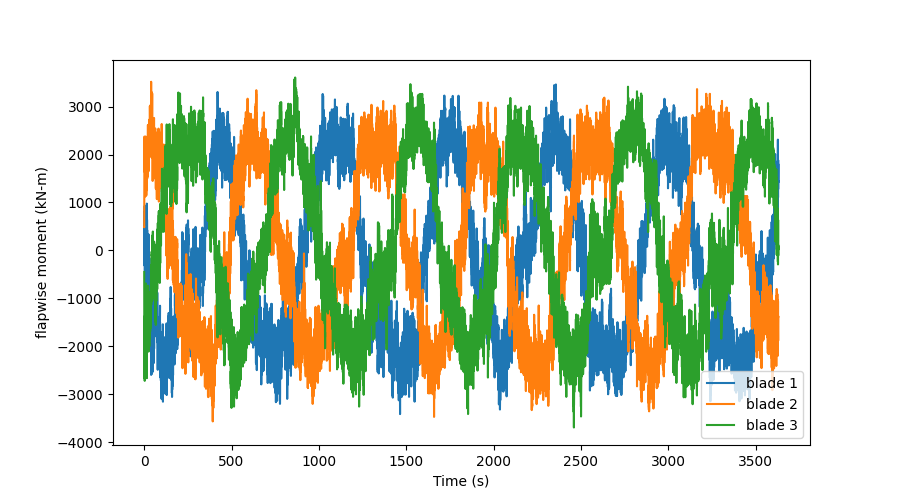

In [135]:
plt.figure(figsize=(9, 5))
data['RootMFlp1 (kN-m)'].plot(label='blade 1')
data['RootMFlp2 (kN-m)'].plot(label='blade 2')
data['RootMFlp3 (kN-m)'].plot(label='blade 3')
plt.ylabel('flapwise moment (kN-m)')
plt.legend()
plt.savefig('flapwise_timeseries.png', dpi=150)

<IPython.core.display.Javascript object>


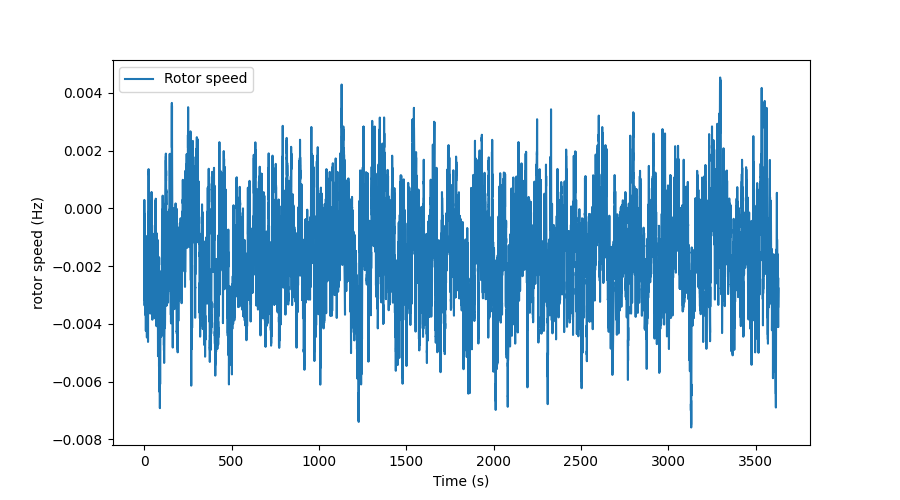

In [133]:
plt.figure(figsize=(9, 5))
data['RtSpeed (Hz)'].plot(label='Rotor speed')

plt.ylabel('rotor speed (Hz)')
plt.legend()
plt.savefig('RtSpeed_timeseries.png', dpi=150)

All three flapwise moments show a very low frequency component where the magnitude of the moment is both symmetrical (~ -3 MNm to 3 MNm) and has an approximate phase shift of 120 DEG. 

Additionally all three moments depict higher frequency fluctuations

## FFT of flapwise moments as well as Rotor Speed and Wind Speed (mag)

In [71]:
deltaT = data.index[1] - data.index[0] # -> gives the deltaT needed to calculate the fourier frequencies
Fs = 1/deltaT

<IPython.core.display.Javascript object>


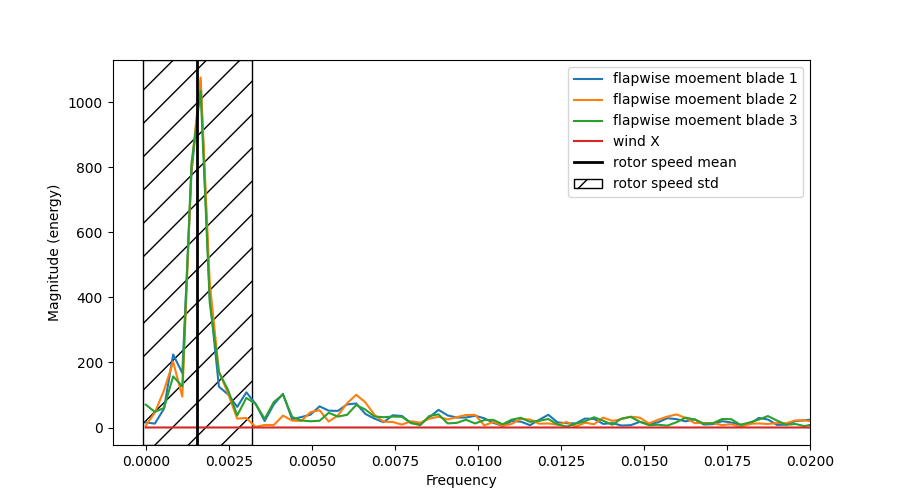

In [136]:
plt.figure(figsize=(9,5))

# magnitude spectrum of the flapwise moments
plt.magnitude_spectrum(data['RootMFlp1 (kN-m)'], Fs=Fs, scale='linear', label='flapwise moement blade 1')
plt.magnitude_spectrum(data['RootMFlp2 (kN-m)'], Fs=Fs, scale='linear', label='flapwise moement blade 2')
plt.magnitude_spectrum(data['RootMFlp3 (kN-m)'], Fs=Fs, scale='linear', label='flapwise moement blade 3')

# Wind1VelX   Wind1VelY   Wind1VelZ

# magnitude spectrum of the wind in x direction
plt.magnitude_spectrum(data['Wind1VelZ (m/s)'] - data['Wind1VelZ (m/s)'].mean(), Fs=Fs, scale='linear', label='wind X')

# magnitude spectrum of rotor speed

# plt.magnitude_spectrum(data['RtSpeed (Hz)'] - data['RtSpeed (Hz)'].mean(), Fs=Fs, scale='dB', label='Rotor speed')

RtSpeedMean = abs(data['RtSpeed (Hz)'].mean())
RtSpeedStd = data['RtSpeed (Hz)'].std()

plt.axvline(x=RtSpeedMean, linewidth=2, label='rotor speed mean', color='k')
plt.axvspan(xmin=RtSpeedMean - RtSpeedStd, 
            xmax=RtSpeedMean + RtSpeedStd, 
            hatch='/', 
            facecolor='white', 
            edgecolor='k',
            label='rotor speed std')

plt.xlim([-0.001, 0.02])
plt.legend()
plt.savefig('spectrum_detail.png', dpi=150)

<IPython.core.display.Javascript object>


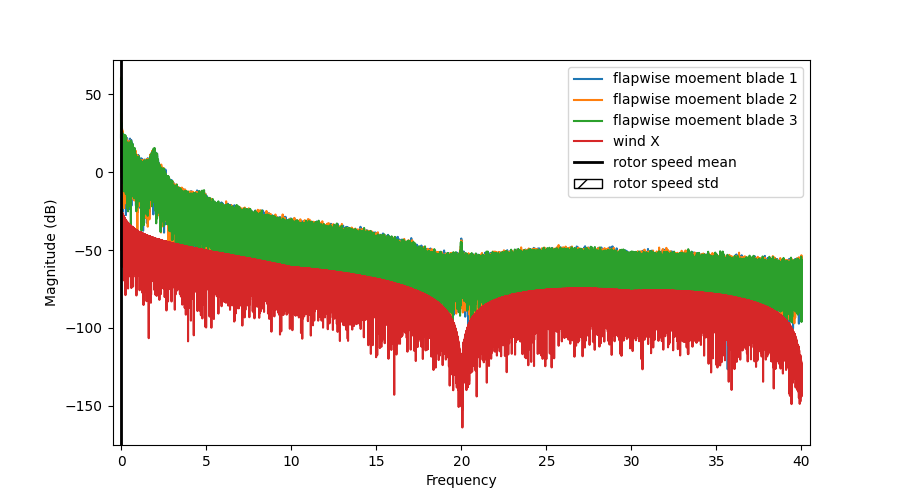

In [132]:
plt.figure(figsize=(9,5))

# magnitude spectrum of the flapwise moments
plt.magnitude_spectrum(data['RootMFlp1 (kN-m)'], Fs=Fs, scale='dB', label='flapwise moement blade 1')
plt.magnitude_spectrum(data['RootMFlp2 (kN-m)'], Fs=Fs, scale='dB', label='flapwise moement blade 2')
plt.magnitude_spectrum(data['RootMFlp3 (kN-m)'], Fs=Fs, scale='dB', label='flapwise moement blade 3')

# Wind1VelX   Wind1VelY   Wind1VelZ

# magnitude spectrum of the wind in x direction
plt.magnitude_spectrum(data['Wind1VelZ (m/s)'] - data['Wind1VelZ (m/s)'].mean(), Fs=Fs, scale='dB', label='wind X')

# magnitude spectrum of rotor speed

# plt.magnitude_spectrum(data['RtSpeed (Hz)'] - data['RtSpeed (Hz)'].mean(), Fs=Fs, scale='dB', label='Rotor speed')

RtSpeedMean = abs(data['RtSpeed (Hz)'].mean())
RtSpeedStd = data['RtSpeed (Hz)'].std()

plt.axvline(x=RtSpeedMean, linewidth=2, label='rotor speed mean', color='k')
plt.axvspan(xmin=RtSpeedMean - RtSpeedStd, 
            xmax=RtSpeedMean + RtSpeedStd, 
            hatch='/', 
            facecolor='white', 
            edgecolor='k',
            label='rotor speed std')

plt.xlim([-0.5, 40.5])
plt.legend()
plt.savefig('spectrum_overview.png', dpi=150)

In [91]:
?plt.magnitude_spectrum

In [119]:
?plt.axvline